# Graph Theory & Network Analysis

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
karate_graph = nx.karate_club_graph()

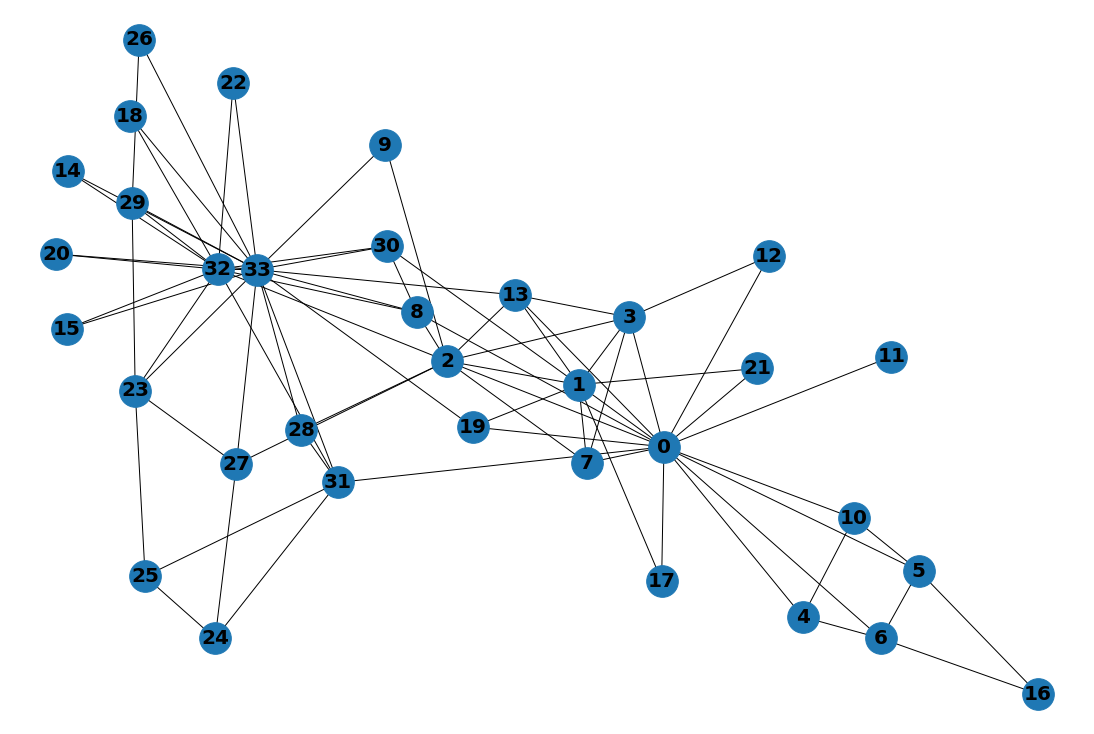

In [5]:
plt.figure(figsize=(15, 10))
nx.draw(karate_graph, with_labels=True, node_size=1000, font_size=20, font_weight='bold')

In [6]:
nx.density(karate_graph)

0.13903743315508021

In [7]:
degree = [x[1] for x in list(karate_graph.degree())]
np.mean(degree)

4.588235294117647

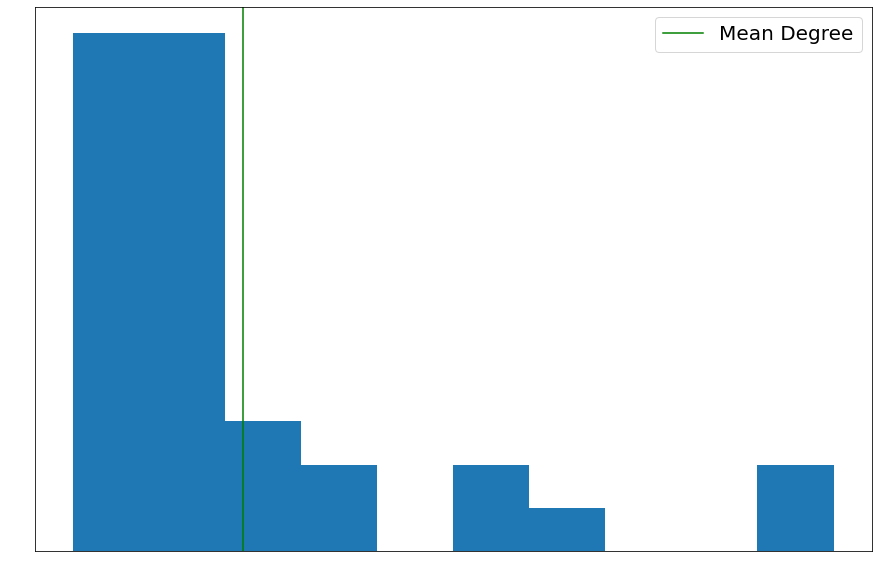

In [8]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
    plt.figure(figsize=(15,10))
    plt.hist(degree)
    plt.axvline(np.mean(degree), color='g',label='Mean Degree')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={"size":20})

In [23]:
labels = nx.get_node_attributes(karate_graph, 'club')

In [11]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

In [12]:
groups = list(greedy_modularity_communities(karate_graph))

In [13]:
print(len(groups))

3


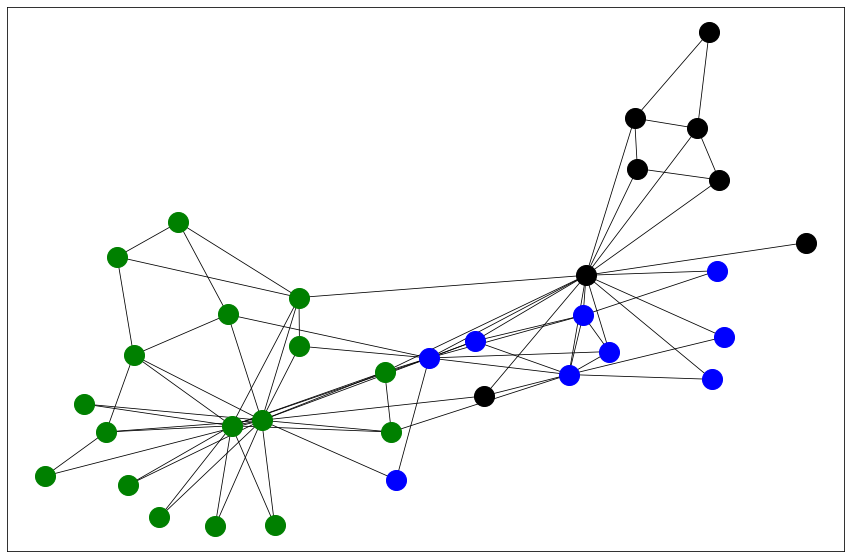

In [15]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(karate_graph)
nx.draw_networkx_nodes(karate_graph, pos, nodelist=list(groups[0]), node_size=400, node_color='g')
nx.draw_networkx_nodes(karate_graph, pos, nodelist=list(groups[1]), node_size=400, node_color='b')
nx.draw_networkx_nodes(karate_graph, pos, nodelist=list(groups[2]), node_size=400, node_color='k')
nx.draw_networkx_edges(karate_graph, pos, width = 0.8)

In [25]:
groups

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

In [26]:
for person in labels:
    if labels[person] == 'Mr. Hi':
        labels[person] = 2
    else:
        labels[person] = 0

In [27]:
n_members = len(list(groups[0])) + len(list(groups[2]))
correct = 0
for member in list(groups[0]):
    if labels[member] == 0:
        correct += 1
for member in list(groups[2]):
    if labels[member] == 2:
        correct += 1

In [28]:
correct/n_members

0.96

In [29]:
new_group = list(groups[1]) + list(groups[2])
n_members = len(list(groups[0])) + len(new_group)
correct = 0
for member in list(groups[0]):
    if labels[member] == 0:
        correct += 1
for member in list(new_group):
    if labels[member] == 2:
        correct += 1

In [30]:
correct/n_members

0.9411764705882353

In [31]:
new_group = list(groups[0]) + list(groups[1])
n_members = len(list(groups[2])) + len(new_group)
correct = 0
for member in list(new_group):
    if labels[member] == 0:
        correct += 1
for member in list(groups[2]):
    if labels[member] == 2:
        correct += 1

In [32]:
correct/n_members

0.7352941176470589